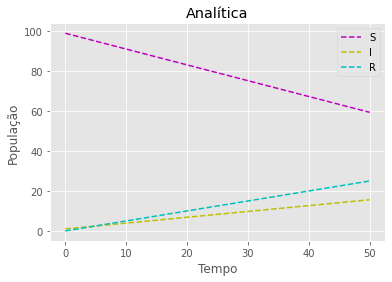

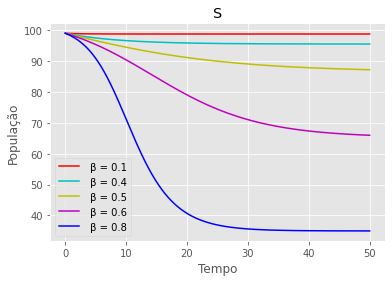

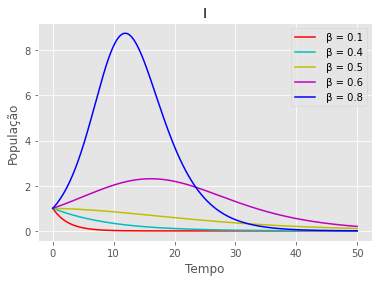

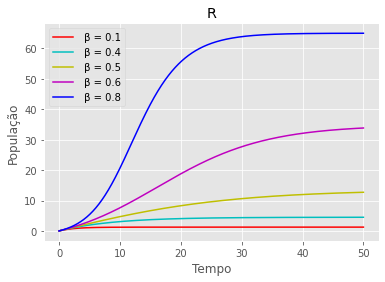

In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

#Definindo Método SIR:
def sirM(y, t, N, beta, gamma):    
    S0, I0, R0 = y
    S = -beta * S0 * I0 / N
    I = beta * S0 * I0 / N - gamma * I0
    R = gamma * I0
    return np.array([S, I, R])

#Calcuando esperado analíticamente:
def sirAnalytic(t, N, beta, gamma, S0, I0, R0):
    S = S0 + (-beta*I0*S0*t/N)
    I = I0 + ((beta*I0*S0*t/N)-gamma*I0*t)
    R = R0 + gamma*I0*t
    return S, I, R

#Integrando pelo método Runge-Kutta 3/8 
def RK38(f, S0, I0, R0, t, N, beta, gamma):
    y = np.array([S0, I0, R0])
    y_list = [y]
    h = t[1]-t[0]
    for i in range(1, len(t)):
        k1 = h * f(y, t[i-1], N, beta, gamma)
        k2 = h * f(y + k1/3, t[i-1]+h/3, N, beta, gamma)
        k3 = h * f(y + 2*k2/3, t[i-1]+2*h/3, N, beta, gamma)
        k4 = h * f(y + k3, t[i], N, beta, gamma)
        y = y + (k1 + 3*k2 + 3*k3 + k4) / 8
        y_list.append(y)
    return np.array(y_list)

S0 = 99
I0 = 1
R0 = 0
N = 100
t = np.linspace(0, 50, 1000)
betas = [0.1, 0.4, 0.5, 0.6, 0.8]
gamma = 0.5


colorplot = ["b","g","r","c","y","m","b","g","r","c","y","m"]

#Plot Analítico:
for beta in betas:
    
    S_analytic, I_analytic, R_analytic = sirAnalytic(t, N, beta, gamma, S0, I0, R0)

plt.plot(t, S_analytic, '--',label='S',c = colorplot[-1])
plt.plot(t, I_analytic, '--',label='I',c = colorplot[-2])
plt.plot(t, R_analytic, '--',label='R',c = colorplot[-3])
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Analítica')
plt.legend()
plt.show()

#Plots de S,I,R para cada β:
for index,beta in enumerate(betas):
    
    sol = RK38(sirM, S0, I0, R0, t, N, beta, gamma)
    S = sol[:,0]
    plt.plot(t, S, label=' β = ' + str(beta),c = colorplot[index+2])
    
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('S')
plt.legend()
plt.show()

for index,beta in enumerate(betas):
    
    sol = RK38(sirM, S0, I0, R0, t, N, beta, gamma)
    I = sol[:,1]
    plt.plot(t, I, label=' β = ' + str(beta),c = colorplot[index+2])

plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('I')
plt.legend()
plt.show()

for index,beta in enumerate(betas):
    
    sol = RK38(sirM, S0, I0, R0, t, N, beta, gamma)
    R = sol[:,2]
    plt.plot(t, R, label=' β = ' + str(beta),c = colorplot[index+2])
    
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('R')
plt.legend()
plt.show()
